<a href="https://colab.research.google.com/github/tavi1402/Data_Science_bootcamp/blob/main/3_3_3_Pandas1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  #       Dealing with Large Datasets using Pandas

It is no lie that 'Data is the new Oil', but the amount of data produced every day is mind-boggling. There is about 2.5 quintillion bytes of data created each day at our current pace. And it is not surprising that,
In the last two years alone, the astonishing 90% of the world’s data has been created.

To be able to handle and engineer such a vast amount of data is **power**.

In This Tutorial we will cover the following topics:
- Loading datasets into Google Colab.
- Fastening Data Loading processes with *pandas.dataframe*
- Memory saving with pandas(Chunking)
- Loading datasets into intermediate file formats.
- Fastening Data Loading processes with other libraries.



Prerequisites:

- You should be familliar with pandas, series and dataframes. If you are not familiar with these concepts, have a quick look at this [helper notebook](https://jovian.ai/aakashns/python-pandas-data-analysis)
- You can find out how to run this notebook on google Colab with this [helper notebook ](https://jovian.ml/aakashns/05-cifar10-cnn/v/51&cellId=2)





`Opendatasets `is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

There are [multiple ways](https://link.medium.com/F4iKWGgrndb) to load your dataset into colab. I have mentioned two below.
Although, using a link to directly download the datasets should be the ideal way to do it.





Steps involved in using opendatasets:
- Mention the url of the dataset into a variable lets say, url_variable.
- Import the dataset library after installing it.
- Use `od.download(url_variable)`
- Colab will ask for kaggle username and key which you can find on your kaggle profile.
- Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens
- Click on Create New API Token - It will download kaggle.json file on your machine. (which contains the required information to download the dataset on your colaboratory)

- Another way you can import datasets into your colaboratory is by uploading the dataset file into your Google drive and by following the processes below to authenticate and mount your drive.

* **Please note** that, I have changed the strings in Path variable for both the cases.

### Python packages like numpy, pandas, sklearn, seaborn etc. makes the data manipulation and ML tasks very convenient.
For *most data analysis tasks*, the python ***pandas*** package is good enough. We can do all sorts of data manipulation with it, and it is compatible for building ML models.
But, as our data gets bigger, bigger than what can fit in the available  RAM, **pandas is not sufficient**.


We could use Spark or Hadoop to solve this, but these cannot actually provide/work in python environments. This will stop us from using numpy, sklearn, pandas, tensorflow, and all the commonly used Python libraries for ML.


In this tutorial, I have illustrated a few ways to work with pandas in order to save memory and time while working with large data.  


At first let's try loading our entire csv file into a dataframe without any formatting in order to reduce memory usage and observe the time.

Pandas took approximately 40-50 seconds to process/load our approximately 1.5GB of dataset into its dataframe. This does not sound so efficient when working with with even larger datasets. There's various ways we can reduce/change this.

I have mentioned how you can load your dataset faster with other packages in python such as dask, pyspark towards the end of this article.  





Pandas is still the go-to option as long as the dataset fits into the user’s RAM.

## Pandas default memory allocation

By default, pandas infers the datatypes of the columns of our dataset in not the most convenient way. Rather, due to its conservative nature, it often results in unnecessary large memory usage for pandas dataframe especially for text data columns with relatively few unique values. One of the ways you can use pandas to scale your data into memory is by lossless compression which I have shown below.

We can pre-define optimal datatypes for our columns based on prior knowledge of the dataset or sample inspection. This way we can store larger datasets in memory.


* You can find information on the dataset I have used [here.](https://smoosavi.org/datasets/us_accidents)

Notice how the columns with high cardinality take up more space, than other. Most columns here are good candidates for converting to **categorical** data types. *With a Categorical, we store each unique name once and use space-efficient integers to know which specific name is used in each row.*

Let me redefine a pandas dataframe by explicitly providing datatypes for my columns or **changing datatypes for certain columns**.  

## Saving Time With Datetime Data
If no arguments are specified, date_time will take on an object dtype.
This is not ideal.` object `is a container for not just str, but any column that can’t neatly fit into one data type. It would be arduous and inefficient to work with dates as strings. (It would also be memory-inefficient.)
We will make our date_time columns as datetime objects. (Timestamp)

As a general rule, Pandas will be far quicker the less it has to interpret your data. In this case, you will see huge speed improvements just by telling Pandas what your time and date data looks like, using the **format parameter**.

You can find the string format codes [here (strftime)](https://strftime.org/), and entering them like this:

`raw_df2[dtime] = raw_df2[dtime].apply(pd.to_datetime, format='%d/%m/%y %H:%M')`

Using `pd.to_numeric`, We can go a bit further and downcast the numeric columns to their smallest types.

Lets have a look at memory being taken by raw_df2.

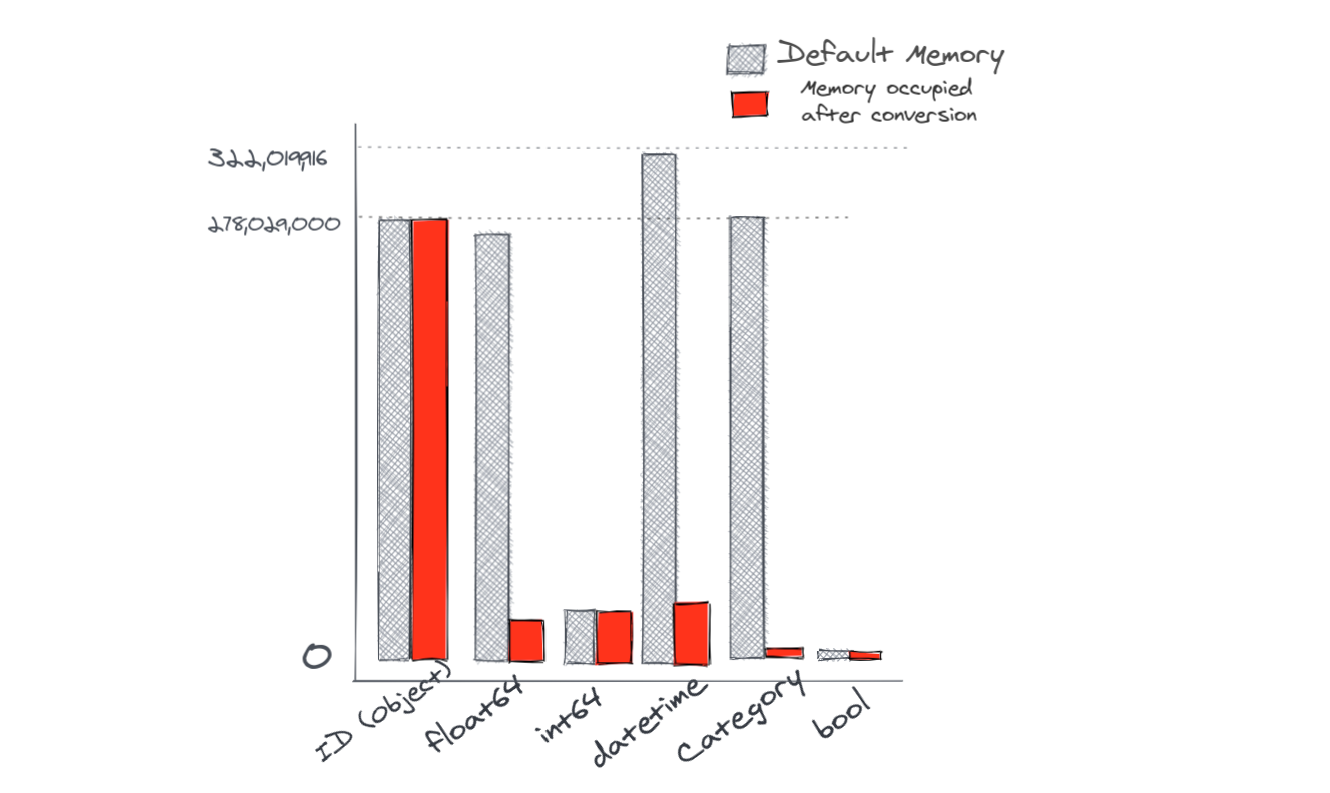

In all, we’ve reduced the in-memory footprint of this dataset to 1/5 of its original size.

### Explicitly providing column datatypes during loading of dataset.

We can pre-define optimal data types of the columns (based on prior knowledge or sample inspection) and provide it explicitly while reading the dataset.
`usecols` is supposed to provide a filter before reading the whole DataFrame into memory; if used properly, there should never be a need to delete columns after reading.

Lets fixate on using 10 random columns and filter out other columns to save memory. (Note that for different outcomes from a dataset, one can have different set of important and unimportant set of columns)


`dtype`, is another method to explicitly provide datatypes. It takes python dict as an argument containing the column names and their datatypes. You can give that a try too. So now my dataframe contains 10 coloumns and same amount of rows we had earlier.


### Chunking
(Another technique to reduce memory usage by pd.read_csv)

While dealing with large data,
we can load and process the data in chunks, loading only part of the file into memory at any given time. i.e  
As an alternative to reading everything into memory, Pandas allows us to read data in small portions. In the case of CSV, we can load only some of the lines into memory at any given time.
And that means you can process files that don’t fit in memory.

In particular, if we use the `chunksize `argument to pandas.read_csv, we get back an iterator over DataFrames, rather than one single DataFrame. Each DataFrame is the next 1000 lines of the CSV:

I will show how this can be done.

https://towardsai.net/p/data-science/efficient-pandas-using-chunksize-for-large-data-sets-c66bf3037f93

Mentioning chunksize with read_csv directly does not give us a dataframe, it gives us an iterable object.

We saw earlier the time taken by pandas.read_csv function for loading 1.5 GB of data into out notebook was approximately 40-50 seconds. Now lets see how we can change that.

### Dask,


In simple words, dask is one of the popular gateways to **parallel computing** in python. So if your machine has quad core cpu, it can utilize all 4 of them simultaneously for computation. In the simplest sense, parallel computing is the simultaneous use of multiple compute resources to solve a computational problem!
Dask holds equivalents of python libraries such as numpy, pandas etc.
We will be using the pandas equivalent: `dask.dataframes`  
We can use DASK as the Drop in replacement of PANDAS.

Here's a good explanation for [parallel computing](https://www.techopedia.com/definition/8777/parallel-computing).

Dask took only about 100-190 millisecond to read our dataset and load it into its dataframe.
Here's a [great article](https://medium.com/analytics-vidhya/a-deep-dive-into-dask-dataframes-7455d66a5bc5) on how Dask uses disk space to reduce memory.


The difference in time taken by the two packages in loading the same amount of data can be seen below. 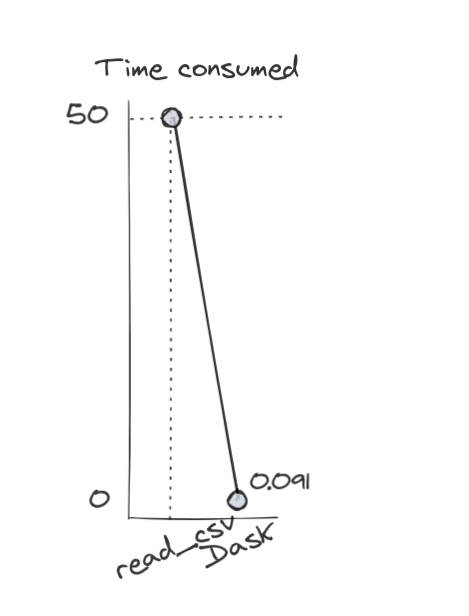



## Other Packages
There are other packages you can try such as **Datatable**, based on R's data.table.
- *Documentation*: https://datatable.readthedocs.io/en/latest/start/index-start.html#

There's also the **Rapids** method to scale data processing directly on GPUs. This eliminates the need to shift your data to GPU while processing your ML model.
- *Documentation*: https://docs.rapids.ai/

And another must know API is **PySpark**,
- *Documentation*: https://spark.apache.org/docs/latest/api/python/index.html

### Here's a suggestion that could help,

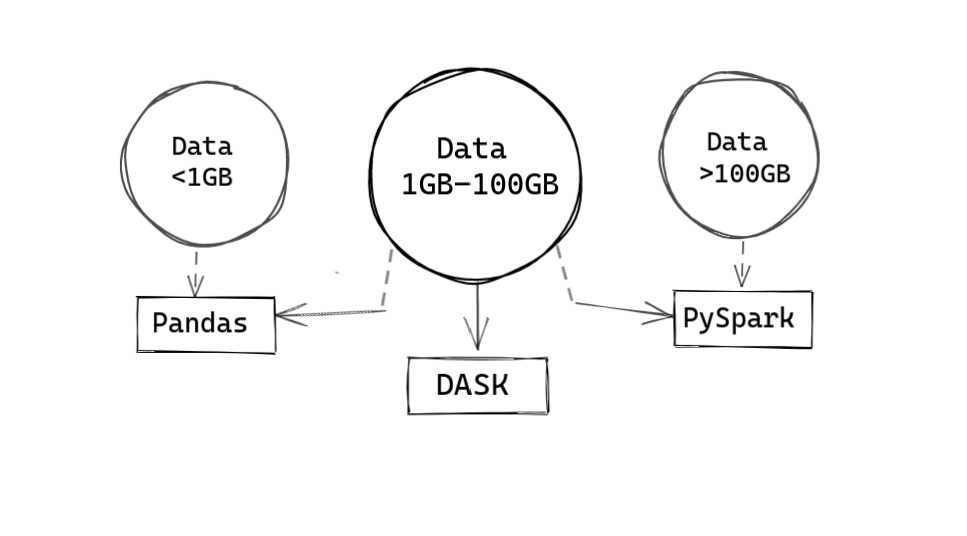

# Intermediate File Formats

There's more to than just loading datasets into our workstation, while we are dealing with large data. It is common to convert our dataset into other formats that use a different memory representation on the disk. These formats provide efficient ways to read and write into data-frames. For example,
`pandas.to_feather()` function provides **BINARY COLUMNAR SERIALIZATION** for data frames which uses *Apache Arrow Columnar memory specification*. This column-memory layout permits o(1) random acess!

More about feather: https://arrow.apache.org/docs/python/feather.html


References:
- [Data](https://www.piesync.com/blog/top-5-problems-with-big-data-and-how-to-solve-them/), https://realpython.com/fast-flexible-pandas/#this-tutorial
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html)
- [Chunking](https://pythonspeed.com/articles/chunking-pandas/)
- [DASK](https://www.machinelearningplus.com/python/dask-tutorial/)
- https://www.machinelearningplus.com/python/dask-tutorial/
- [Cheatsheet](https://attachments.convertkitcdnm.com/147732/2a30f1c4-8afa-4414-aed1-4d4994504ec1/reducememory.pdf)


## Further Reading
- [Fast subsets of large datasets](https://pythonspeed.com/articles/indexing-pandas-sqlite/)
- [Lossy compression](https://pythonspeed.com/articles/pandas-reduce-memory-lossy/)
- [Faster loading with python and c++](https://blog.esciencecenter.nl/irregular-data-in-pandas-using-c-88ce311cb9ef)